# Importing the Target(Output) Matrix

Output of the forging proces is part on the picture. Upper drawing is showing the raw part before the forging process and lower drawing is nominal ouput of the process. 
    
![Form/Pre-Form](pictures/Form-Pre-Form.png)

Lower drawing is showing how part should look like with nominal dimensions and tolerances for each dimension. After production process, there are always some deviations from the nominal value. We will see that after importing the data. 

The dimensions visible on drawing and some other that are not shown here are target matrix for this analysis.

Now we will have a look at the data containing these measured dimensions:

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

font = {'family' : 'Times New Roman', 'weight' : 'normal', 'size'   : 17}
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rc('font', **font)

In [3]:
target=pd.read_excel(Path('Data')/'AFRC Radial Forge - Zenodoo Upload v3'/'Data'/'CMMData.xlsx', index_col=3)
target=target.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
#target.index

nominal_val=pd.DataFrame(target.iloc[0:3,:])
target=target.iloc[3:,:]
#Path('Data')/'AFRC Radial Forge - Zenodoo Upload v3'/'Data'/file_format

Data is 2D matrix where first row is showing nominal values for dimensions,second and third are positive and negative tolerance and other rows are outputs for 81 produced parts. Column names are these dimensions. 

In [4]:
print("Number of measured output dimensions is ", nominal_val.shape[1],",\n\nand nominal values and tolerances are:")
nominal_val

Number of measured output dimensions is  18 ,

and nominal values and tolerances are:


,ID @100,ID @55,38 dia @200,42 dia @140,42 dia @80,Base angle F,Base angle BR,Base angle BL,162mm taper F,162mm taper BR,162mm taper BL,40.5mm taper F,40.5mm taper BR,40.5mm taper BL,Top1,Top2,Top3,Top4
NaN,30.0,30.0,38.0,42.0,42.0,70.0,70.0,70.0,162.0,162.0,162.0,40.5,40.5,40.5,222.0,222.0,222.0,222.0
NaN,0.3,0.3,0.4,0.4,0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.0,15.0,15.0,15.0
Part ID,-0.3,-0.3,-0.4,-0.4,-0.4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-5.0,-5.0,-5.0,-5.0


In [5]:
target.head()

,ID @100,ID @55,38 dia @200,42 dia @140,42 dia @80,Base angle F,Base angle BR,Base angle BL,162mm taper F,162mm taper BR,162mm taper BL,40.5mm taper F,40.5mm taper BR,40.5mm taper BL,Top1,Top2,Top3,Top4
1,29.850,29.550,38.040,41.970,42.156,70.262,69.925,69.862,161.584,161.679,161.618,40.629,40.679,40.693,232.279,234.225,233.071,233.112
2,29.853,29.564,38.036,41.963,42.154,70.181,70.056,70.390,161.672,161.565,161.708,40.685,40.623,40.466,233.213,233.851,232.667,234.183
3,29.854,29.558,38.024,41.955,42.141,70.027,69.904,69.781,161.629,161.539,161.691,40.554,40.524,40.674,232.505,234.582,233.839,234.638
4,29.855,29.563,38.017,41.955,42.136,69.769,69.705,69.788,161.747,161.611,161.567,40.668,40.632,40.473,234.954,235.349,233.988,236.026
5,29.860,29.571,38.007,41.943,42.135,69.957,69.741,69.990,161.562,161.543,161.538,40.630,40.552,40.482,234.646,234.190,233.299,235.538


To explain the deviations from nominal dimensions, which is the thing we are predicting, we will have a look at some of the measured dimension for all parts available here. Nominal value for each dimension is located in the `nominal_val`. Example is given for one of the external diameters, and deviations for each part is plotted.

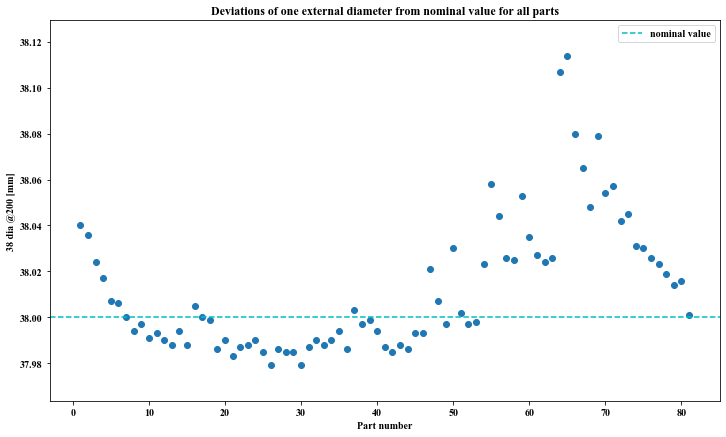

In [6]:
target["Nominal 38 dia @200"]=nominal_val["38 dia @200"][0]

plt.figure(figsize=(12,7))

plt.subplot(111)
plt.title('Deviations of one external diameter from nominal value for all parts')

plt.scatter(target["38 dia @200"].index,target["38 dia @200"] )
plt.axhline(38, c='c', ls='--', label="nominal value")
plt.xlabel('Part number')
plt.ylabel('38 dia @200 [mm]')
plt.legend()

All these measurements are described in `ForgedPartDataStructureSummaryv3.xlsx`. For example, `38 dia @200` is external diameter measurment taken at 200mm from the left side (drawing on first picture), and Base angle `Base angle BR` is base angle between elongated billet and 1st tapper at R axis position (R axis is one of the hammers axes) etc.

If we plot pairplot for 7 of these target vectors, we can see that some of them are also correlated, for example external diameters at different positions are correlated.

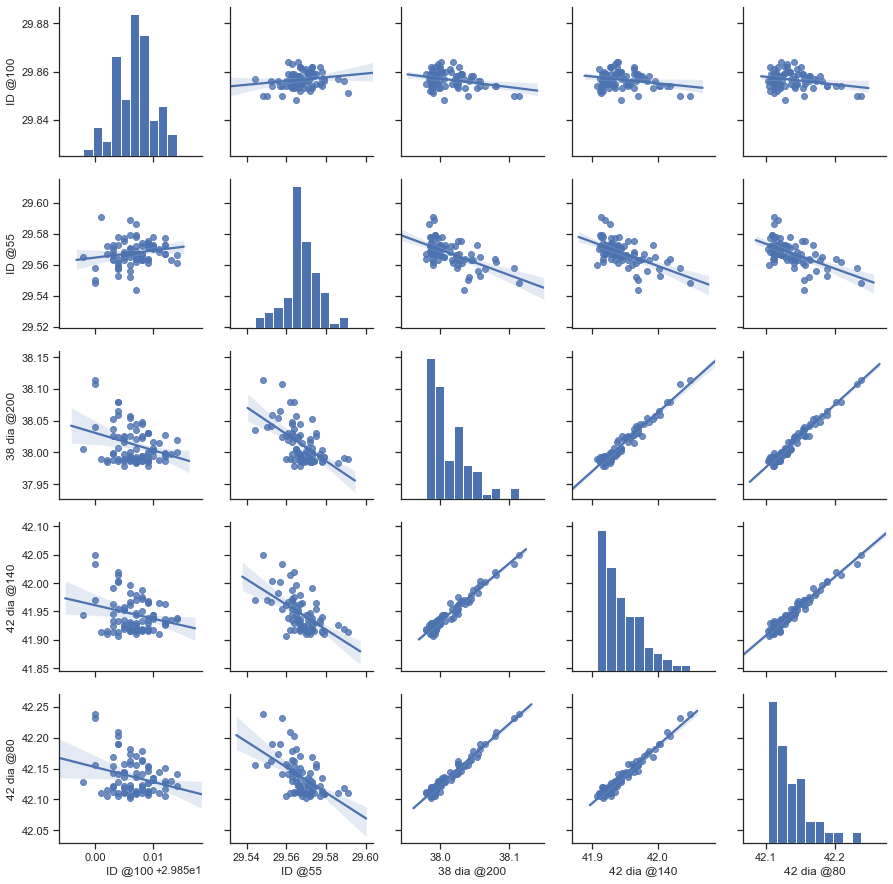

In [7]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

sns.pairplot(target.iloc[:,:5], kind="reg")